# Contents

1. [Eigenenergy](#eigenenergy)
2. [Eigenstates](#eigenstates)
3. [Superposition](#superposition)

We first import the needed packages. 

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

## 1. Eigenenegy <a id="eigenenergy"></a>

In quantum mechanics, the energy of a system is quantized. For quantized electrodynamic fields, the energy of a system resembles a harmonic osciallator. We can consider an electron confined in a one dimensional box with a length $L=0.1$ nm.

The energy of the ground level is $$E_1= \frac{\hbar^2\pi^2}{2mL^2}.$$

For higher eigenstates $n$, the eigenenergy is proportional to $E_1$ with the relation as: $$E_n=n^2E_1.$$

Below, we compute the eigenenergies up ot $n=5$.

In [101]:
# Initializing constants 
L = 0.1*10**-9

# Defining the function of nth energy (in eV)
def E_n(n):
    E = (const.hbar*n*const.pi)**2/(2*const.m_e*L**2)
    E_eV = E/const.e
    return E_eV

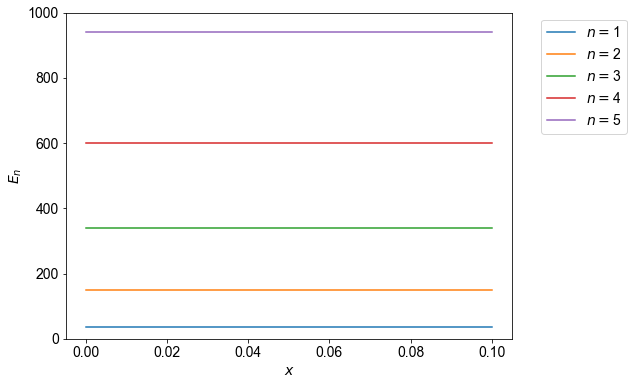

In [102]:
# Defining the range of x values and the number of states 
xs = np.linspace(0.0001, L*1e9, 200)
ns = np.arange(1,6,1)

plt.figure(figsize=(8,6))
for i in ns:
    ys = E_n(i) * (xs/xs)
    plt.plot(xs, ys ,label=r'$n=$'+str(i))

# Add a legend    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=14)

# Set limit of y axis
plt.ylim(0,1000)

# Set axis label 
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$E_n$", fontsize=14)

# Set larger tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()

## 2. Eigenstates <a id="eigenstates"></a>

In a finite quantum well, the $n$-th eigenstates are 
$$\psi_n (x) =  \sqrt{\frac{2}{L}} \sin{\left( \frac{n\pi}{L}x \right)}$$

Below, we plot the eigenstates up to $n=3$.

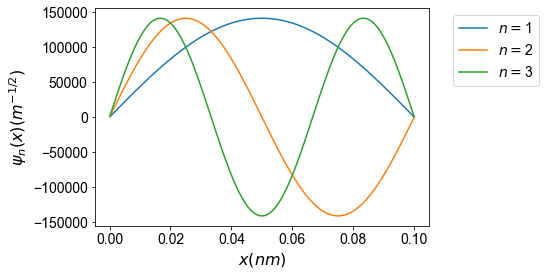

In [103]:
# Defining wavefunction 
def psi_n(x,n):
    tempL = 0.1
    temp = np.sqrt(2/tempL)*np.sin(n*sp.pi*x/tempL)/np.sqrt(1e-9)
    return temp

# Defining the list of n
ns = np.arange(1,4,1)

for n in ns:
    plt.plot(xs,psi_n(xs,n),label=r'$n=$'+str(n))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=14)

plt.xlabel("$x(nm)$", fontsize=16)
plt.ylabel("$\psi_{n}(x) (m^{-1/2})$", fontsize=16)

# Set larger tick labels and ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

We can expect the maximum value of $\psi_n(x)$ to be $\sqrt{2/L}$. To verify this, we have printed the maximum value for each plotted wavefunction. 

We notice that the maximum value are close but not exactly equal to the expected maximum value. This is due to the step size of $x$. With a smaller step size of $x$, it should give a maximum value closer to the expected value. 

In [104]:
print('The expected maximum value of any wavefunction is ',np.sqrt(2/L))
print('')

for i in range(3):
    print('Maximum value of the wavefunction n =',str(n),'is',max(psi_n(xs,i+1)))

The expected maximum value of any wavefunction is  141421.3562373095

Maximum value of the wavefunction n = 3 is 141418.53657477218
Maximum value of the wavefunction n = 3 is 141410.13402104998
Maximum value of the wavefunction n = 3 is 141421.35616681768


## 3. Superposition <a id="superposition"></a>

One of the most important quantum phenomenon is superposition. In this case, when an electron is in superposition, it means the electron can be in different eigenstates simultaneouly. Any states in superposition are non-stationary. To understand this phenomenon, we consider the case where an electron is in the superposition of the two lowest states: $\psi_1$ and $\psi_2$. Below, we have plotted the graph of the probability of the position of the electron at different times. We can observe that the probability of such location changes as the time changes. 


In [105]:
# Define superposition state 
def Psi_s(xs,t):
    psi_1 = psi_n(xs,1)*np.cos(-E_n(1)*const.e*t/const.hbar)
    psi_2 = psi_n(xs,2)*np.cos(-E_n(2)*const.e*t/const.hbar)
    return (psi_1+psi_2)/np.sqrt(2)

# Define propbability of the superposition state 
def prob_s(xs,t):
    E1 = E_n(1)*sp.e
    E2 = E_n(2)*sp.e
    psi_1 = psi_n(xs,1)
    psi_2 = psi_n(xs,2)
    prob = (1/2)*(np.cos(t*(E1-E2)/const.hbar*2)) 
    return (1/2)*(np.square(psi_1) + np.square(psi_2) + np.multiply(psi_1,psi_2)*2*np.cos((E1-E2)*t/const.hbar)) 

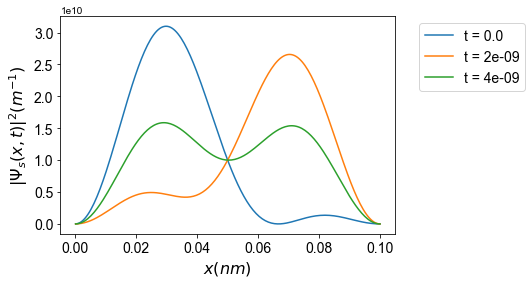

In [106]:
ts = np.arange(0,5e-9,2e-9)

for t in ts:
    plt.plot(xs,prob_s(xs,t)*xs/xs,label='t = %s' % t)
    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=14)
    
plt.xlabel("$x(nm)$", fontsize=16)
plt.ylabel("$|\Psi_s(x,t)|^2 (m^{-1})$", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Superposition_pdf.png',bbox_inches="tight")
plt.show()